In [16]:
import numpy as np
import pandas as pd
import math
import sklearn
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import mean_squared_error

In [17]:
# read in data, pull out variables of interest and scale quantitative variables
cd = pd.read_csv("https://bitbucket.org/remcc/rob-data-sets/downloads/susedcars.csv")
cd = cd[['price','mileage','color']]
cd['price'] = cd['price']/1000
cd['mileage'] = cd['mileage']/1000
cd.head()

,price,mileage,color
0,43.995,36.858,Silver
1,44.995,46.883,Black
2,25.999,108.759,White
3,33.880,35.187,Black
4,34.895,48.153,Black


In [18]:
# split into train and test data (75/25 split)
cdtr, cdte = train_test_split(cd,random_state=99, test_size=.25)
print('train dimension',cdtr.shape)
print('test dimension',cdte.shape)

train dimension (750, 3)
test dimension (250, 3)


Text(0, 0.5, 'price')

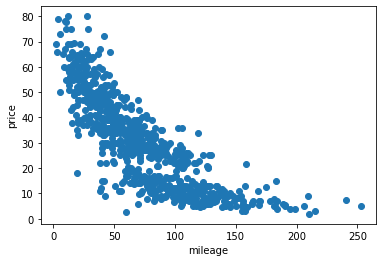

In [19]:
# plot training data with mileage and price
plt.scatter(cdtr['mileage'],cdtr['price'])
plt.xlabel('mileage'); plt.ylabel('price')

In [20]:
# LINEAR REGRESSION on just mileage
lm1 = LinearRegression(fit_intercept=True)
lm1.fit(cdtr[['mileage']],cdtr['price'])

LinearRegression()

In [21]:
# predict on test data
yhtest = lm1.predict(cdte[['mileage']])

Text(0, 0.5, 'price')

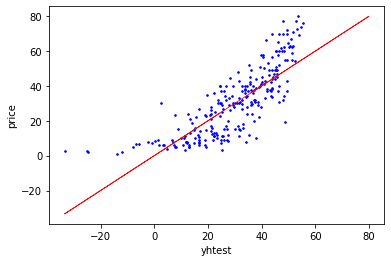

In [22]:
# plot predictions vs actual price with test data
yy = np.concatenate([yhtest,cdte['price'].to_numpy()])
plt.plot(yy,yy,c='red',linewidth=.8)
plt.scatter(yhtest,cdte['price'],c='blue',s=2.5)
plt.xlabel('yhtest'); plt.ylabel('price')

In [23]:
# find rmse with scikit-learn
rmse = math.sqrt(mean_squared_error(yhtest,cdte['price']))
print(f'rmse using just mileage is {rmse:0.2f}')

rmse using just mileage is 11.65


In [24]:
# hard code to check rmse
def rmse(y,yh):
    return(math.sqrt(np.mean((y-yh)**2)))

print(rmse(cdte['price'],yhtest))

11.647566500771871


In [25]:
# out of sample R-squared
np.corrcoef(cdte['price'],yhtest)**2

array([[1.        , 0.65067373],
       [0.65067373, 1.        ]])

In [26]:
# create dummy variables for color
one_hot = LabelBinarizer()
cdumtr = one_hot.fit_transform(cdtr['color'])
cdumte = one_hot.fit_transform(cdte['color'])
print(cdtr['color'][:10])
cdumtr[:10]

644     Black
389     Black
999     other
125     Black
792    Silver
464    Silver
676     other
606     White
319    Silver
466     Black
Name: color, dtype: object


array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]])

In [27]:
# create train and test arrays for encoded color and mileage variables
Xctr = np.hstack([cdtr.iloc[:,[1]].to_numpy(),cdumtr[:,1:4]])
Xcte = np.hstack([cdte.iloc[:,[1]].to_numpy(),cdumte[:,1:4]])
Xctr[:5]

array([[ 47.894,   0.   ,   0.   ,   0.   ],
       [ 27.295,   0.   ,   0.   ,   0.   ],
       [131.121,   0.   ,   0.   ,   1.   ],
       [ 12.097,   0.   ,   0.   ,   0.   ],
       [109.609,   1.   ,   0.   ,   0.   ]])

In [28]:
# linear gression with two variables, color and mileage, and get predictions
lm2 = LinearRegression(fit_intercept=True)
lm2.fit(Xctr,cdtr['price'])
yhtest = lm2.predict(Xcte)

In [29]:
#coefficients and intercept for linear regression equation
print('intercept:',lm2.intercept_)
print('slopes:',lm2.coef_)

intercept: 57.21245645145676
slopes: [-0.34247931 -4.43507734 -0.38043861 -3.4692273 ]


Text(0, 0.5, 'predictions using mileage and color')

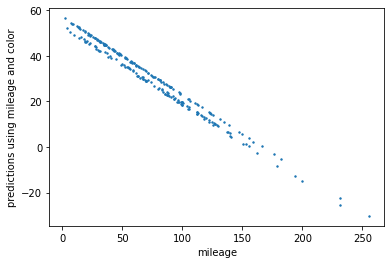

In [30]:
# plot predictions vs mileage
plt.scatter(cdte['mileage'],yhtest,s=2.0)
plt.xlabel('mileage'); plt.ylabel('predictions using mileage and color')

In [31]:
# check out of sample rmse
rmse = math.sqrt(mean_squared_error(yhtest,cdte['price']))
print(f'rmse using mileage and color is {rmse:0.2f}')

rmse using mileage and color is 11.39


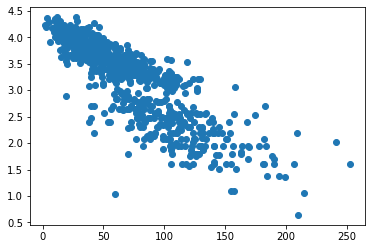

In [32]:
#log transform y to remove negative prices
lprice = np.log(cdtr['price'])
plt.scatter(cdtr['mileage'],lprice)

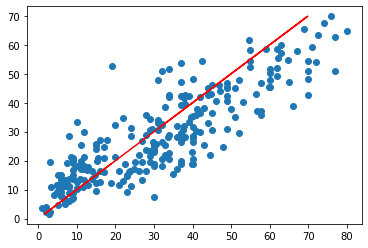

In [33]:
# do linear regression and predictions with log model
lm3 = LinearRegression(fit_intercept=True)
lm3.fit(cdtr[['mileage']],lprice)

lyhat = lm3.predict(cdte[['mileage']])
yhat = np.exp(lyhat)
plt.scatter(cdte['price'],yhat)
plt.plot(yhat,yhat,c='red')

Text(0, 0.5, 'price')

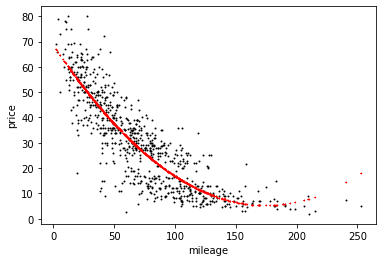

In [34]:
# add a quadratic term for mileage to regression for comparison
Xq = np.column_stack([cdtr['mileage'],cdtr['mileage']**2])
lm4 = LinearRegression(fit_intercept=True)
lm4.fit(Xq,cdtr['price'])
yhat = lm4.predict(Xq)

plt.scatter(cdtr['mileage'],cdtr['price'],marker='o',c='black',s=.9)
plt.scatter(cdtr['mileage'],yhat,marker=5,c='red',s=.9)
plt.xlabel('mileage'); plt.ylabel('price')